In [1]:
import pandas as pd
import seaborn as sns
import datetime
import os

In [2]:
sns.set()
%matplotlib inline

In [3]:
hoje = datetime.datetime.today()

In [4]:
path_dados = '../Dados_site/'

In [5]:
file_propostas = os.path.join(path_dados, f'propostas_pdm_{hoje.day}_{hoje.month}.xlsx')
file_revisoes = os.path.join(path_dados, f'revisoes_pdm_{hoje.day}_{hoje.month}.xlsx')

In [6]:
prop = pd.read_excel(file_propostas)
revi = pd.read_excel(file_revisoes)

In [7]:
num_prop = len(prop)

In [8]:
num_revi = len(revi)

In [9]:
print(f'''O número de propostas na plataforma Participe+ é de {num_prop}. 
        O número de revisões é {num_revi}
        O total de contribuições é {num_prop+num_revi}''')

O número de propostas na plataforma Participe+ é de 864. 
        O número de revisões é 750
        O total de contribuições é 1614


In [10]:
prop['data_submissao'] = pd.to_datetime(prop['data_submissao'], format = '%d/%m/%Y')
prop['count'] = 1

In [11]:
props_por_data = prop.sort_values(by='data_submissao').groupby('data_submissao').count()[['count']].copy()

Text(0, 0.5, 'Qtd propostas')

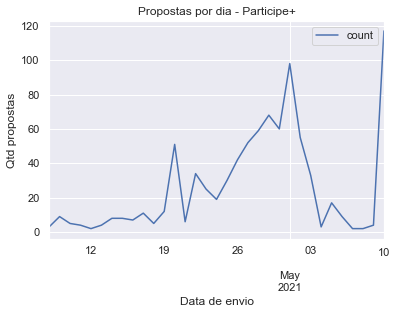

In [12]:
ax = props_por_data.plot(title  = 'Propostas por dia - Participe+')
ax.set_xlabel("Data de envio")
ax.set_ylabel("Qtd propostas")

In [13]:
props_por_data['cumulativo'] = props_por_data['count'].cumsum()

Text(0, 0.5, 'Qtd propostas acumuladas')

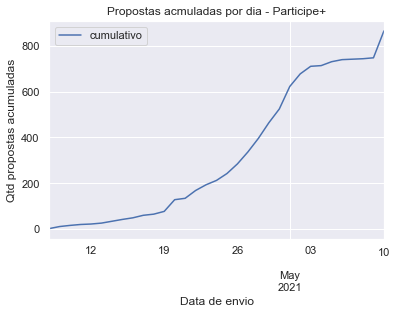

In [14]:
ax = props_por_data[['cumulativo']].plot(title  = 'Propostas acmuladas por dia - Participe+')
ax.set_xlabel("Data de envio")
ax.set_ylabel("Qtd propostas acumuladas")

In [15]:
fig = ax.get_figure()
fig.savefig('grafico_propostas_cumulativo_final.jpg')